In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
retail = pd.read_excel('cleaned.xlsx')

In [5]:
print(retail['Price'].describe())

count    393517.000000
mean          3.343687
std           9.927423
min           0.060000
25%           1.250000
50%           2.100000
75%           4.130000
max        5117.030000
Name: Price, dtype: float64


In [6]:
p20 = retail['Price'].quantile(0.2)
p80 = retail['Price'].quantile(0.8)
retail2 = retail[(retail['Price'] >= p20) & (retail['Price'] <= p80)].reset_index(drop=True)
retail2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Invoice                   271940 non-null  int64         
 1   StockCode                 271940 non-null  object        
 2   Description               271940 non-null  object        
 3   Quantity                  271940 non-null  int64         
 4   Price                     271940 non-null  float64       
 5   Customer ID               217397 non-null  float64       
 6   Country                   271940 non-null  object        
 7   Date                      271940 non-null  datetime64[ns]
 8   Variations                271940 non-null  object        
 9   Base Product              271940 non-null  object        
 10  Variation Type            271940 non-null  object        
 11  Variation Detail          271940 non-null  object        
 12  Cu

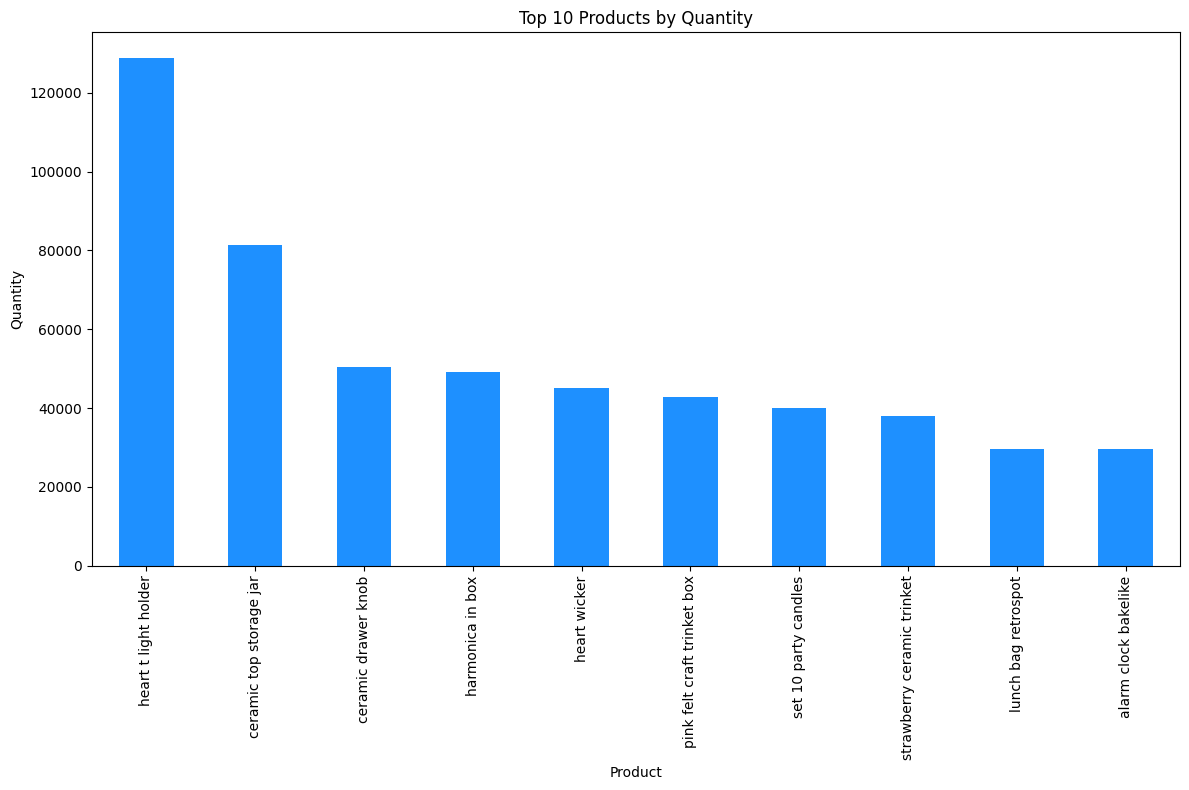

In [7]:
top_products = retail2.groupby('Base Product')['Quantity'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
plot1 = top_products.head(10).plot(kind='bar', color = 'dodgerblue', title='Top 10 Products by Quantity')
plot1.set_ylabel('Quantity')
plot1.set_xlabel('Product')
plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90, ha='center')
plt.tight_layout()
plt.show()

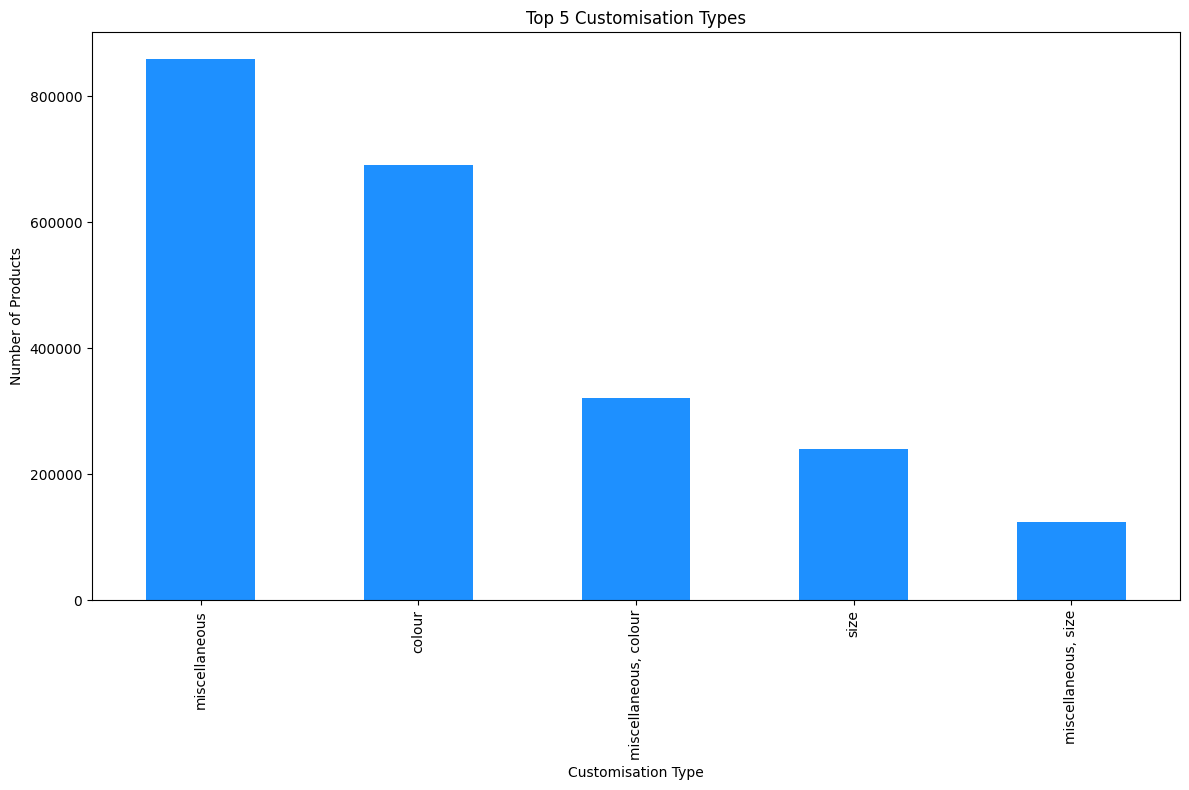

In [21]:
top_customisations = retail2.groupby('Variation Type')['Quantity'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(12, 8))
plot2 = top_customisations.plot(kind='bar', color='dodgerblue', title='Top 5 Customisation Types')
plot2.set_ylabel('Number of Products')
plot2.set_xlabel('Customisation Type')
plot2.set_xticklabels(plot2.get_xticklabels(), rotation=90, ha='center')
plt.tight_layout()
plt.show()

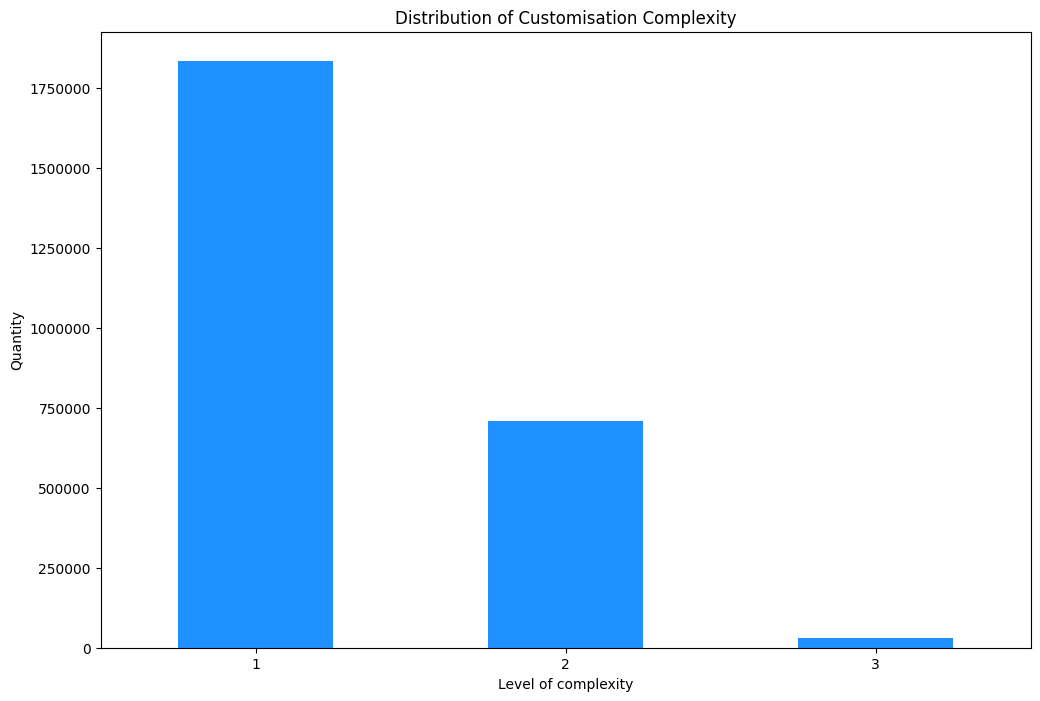

In [26]:
retail2['Customisation Complexity'] = retail2['Customisation Complexity'].astype(int)
complexity_counts = retail2.groupby('Customisation Complexity')['Quantity'].sum()
plt.figure(figsize=(12, 8))
plot3 = complexity_counts.plot(kind='bar', color='dodgerblue', title='Distribution of Customisation Complexity')
plot3.set_xlabel("Level of complexity")
plot3.set_ylabel("Quantity")
plt.xticks(rotation=0)
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)

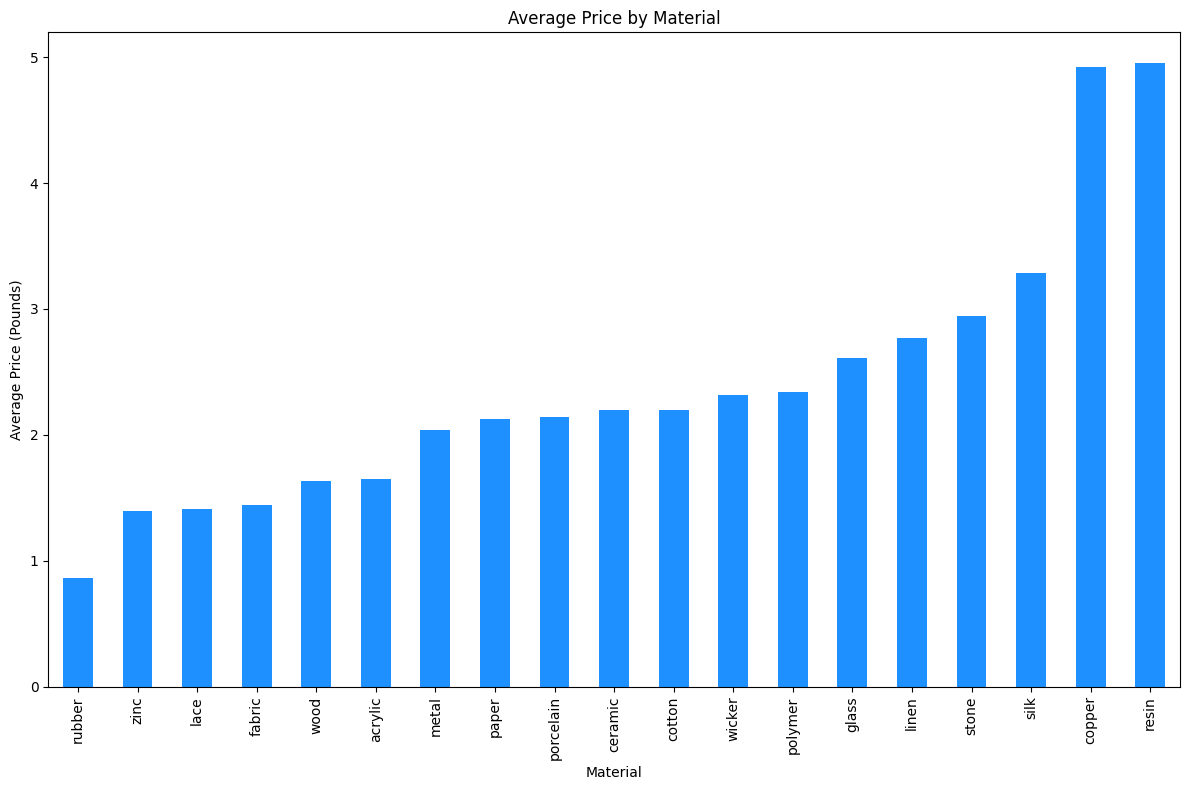

In [17]:
material_price_corr = retail2.groupby('Material')['Price'].mean().sort_values()
plt.figure(figsize=(12, 8))
plot4 = material_price_corr.plot(kind='bar',color='dodgerblue', title='Average Price by Material')
plot4.set_ylabel('Average Price (Pounds)')
plot4.set_xlabel('Material')
plot4.set_xticklabels(plot4.get_xticklabels(), rotation=90, ha='center')
plt.tight_layout()

Text(0.5, 1.0, 'Correlation Matrix')

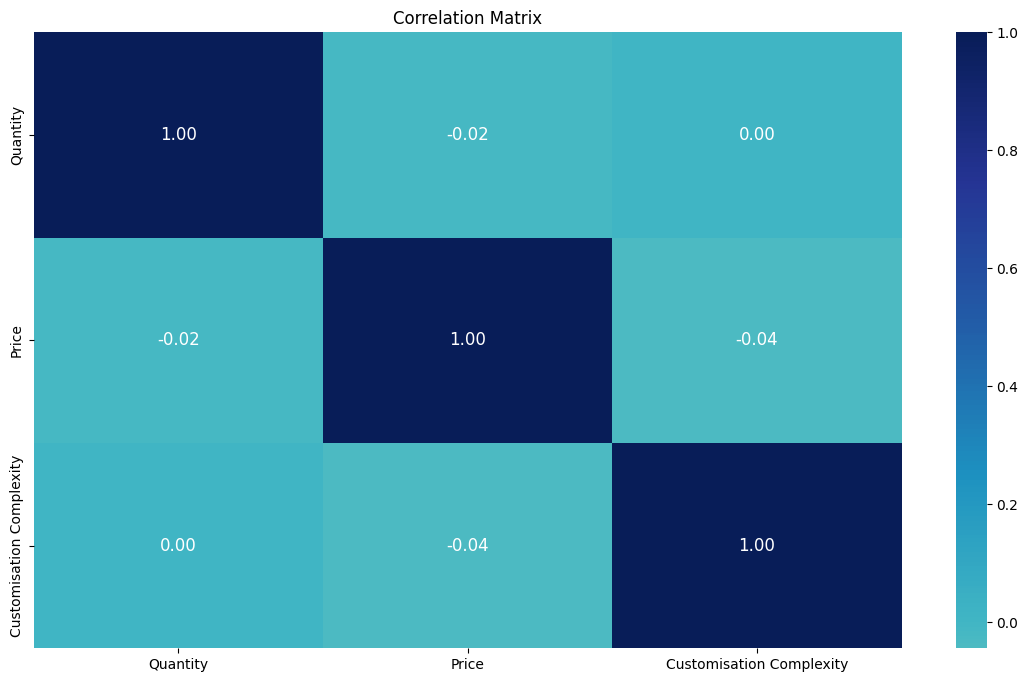

In [27]:
correlation_matrix = retail2[['Quantity', 'Price', 'Customisation Complexity']].corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap ='YlGnBu', center=0, fmt=".2f", annot_kws={"size": 12})
plt.title('Correlation Matrix')

C:\Users\xiang\AppData\Local\Temp\ipykernel_26020\387010679.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=retail2, x='Customisation Complexity', y='Price', palette='Blues')


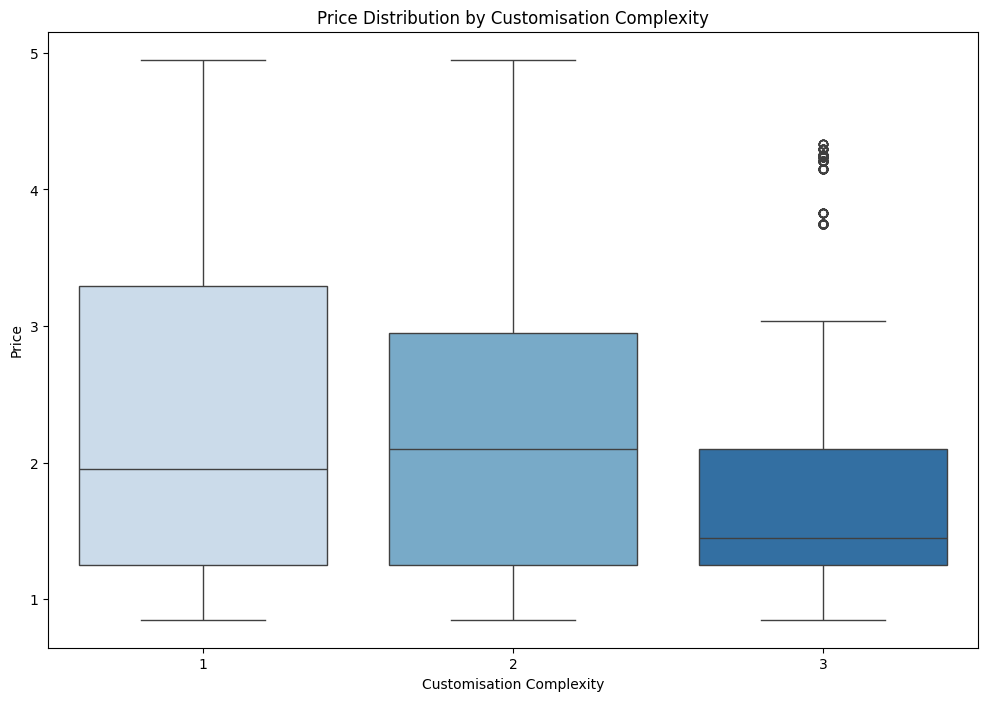

In [28]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=retail2, x='Customisation Complexity', y='Price', palette='Blues')

plt.title('Price Distribution by Customisation Complexity')
plt.xlabel('Customisation Complexity')
plt.ylabel('Price')

plt.show()

### Count Data Occurences for Sequential Data

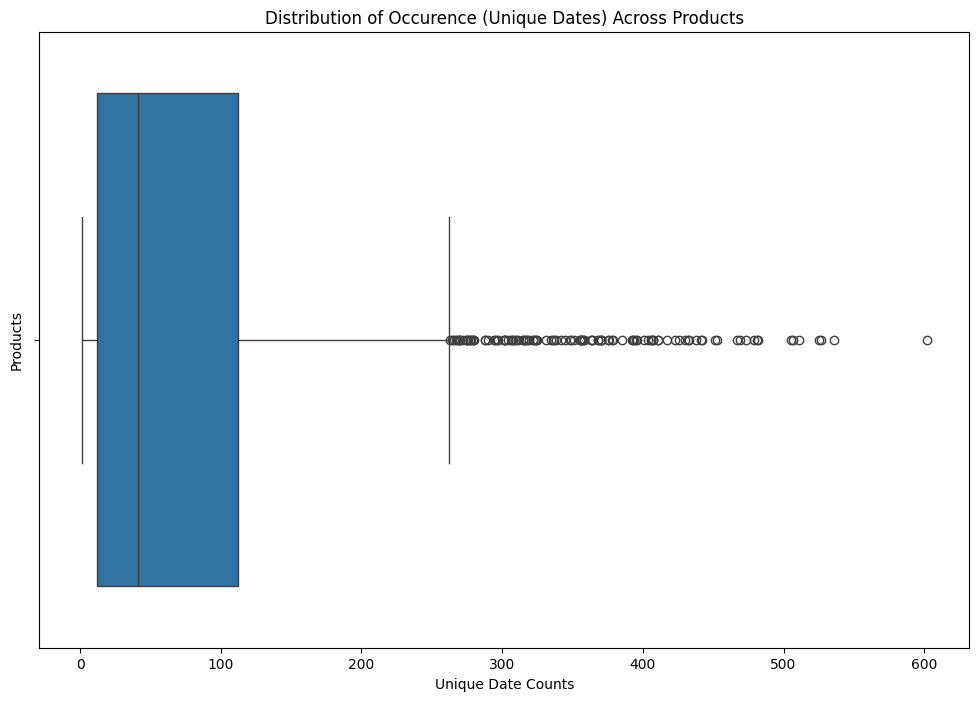

                              Description  Occurences
1821   white hanging heart t light holder         602
1715       strawberry ceramic trinket box         536
757      hanging heart jar t light holder         527
758     hanging heart zinc t light holder         525
1184    pink cream felt craft trinket box         511
...                                   ...         ...
567   fine silver necklace w pastel flowe           1
0          11 pc ceramic tea set polkadot           1
1853           wooden box advent calendar           1
1856    wooden heart christmas scandispot           1
1878      yellow giant garden thermometer           1

[1902 rows x 2 columns]


,Occurences
count,1902.000000
mean,79.232387
std,95.843116
min,1.000000
25%,12.000000
50%,41.000000
75%,112.000000
max,602.000000


In [29]:
occurences = retail2.groupby('Description')['Date'].nunique().reset_index(name='Occurences')

plt.figure(figsize=(12, 8))

sns.boxplot(data=occurences, x='Occurences', orient='h')

plt.title("Distribution of Occurence (Unique Dates) Across Products")
plt.xlabel("Unique Date Counts")
plt.ylabel("Products")
plt.show()

print(occurences.sort_values(by='Occurences', ascending=False))
occurences.describe()

In [30]:
min_unique_dates = 60
sufficient_data_products = occurences[occurences['Occurences'] >= min_unique_dates]
retail2 = retail2[retail2['Description'].isin(sufficient_data_products['Description'])]

In [31]:
retail3 = retail2.copy()
retail3 = retail3.drop(['StockCode', 'Customer ID', 'Invoice', 'Variations'], axis=1)
retail3.reset_index(drop=True, inplace=True)
order = [
    'Base Product', 'Description', 'Quantity', 'Country', 'Variation Type', 'Variation Detail', 'Customisation Complexity', 'Material',
    'Price', 'Date']
retail3 = retail3[order]

In [32]:
final = retail3.groupby(['Base Product', 'Description', 'Date']).agg({
    'Quantity': 'sum', 
    'Variation Type': 'first',
    'Variation Detail': 'first',
    'Customisation Complexity': 'first',
    'Material': 'first',
    'Price': 'first',  
    'Country': 'first'
}).reset_index()

In [33]:
final.head()

,Base Product,Description,Date,Quantity,Variation Type,Variation Detail,Customisation Complexity,Material,Price,Country
0,12 pencils tall tube,12 pencils tall tube skulls,2009-12-01,28,miscellaneous,miscellaneous: skulls,1,polymer,0.85,United Kingdom
1,12 pencils tall tube,12 pencils tall tube skulls,2009-12-02,25,miscellaneous,miscellaneous: skulls,1,polymer,0.85,United Kingdom
2,12 pencils tall tube,12 pencils tall tube skulls,2009-12-03,28,miscellaneous,miscellaneous: skulls,1,polymer,0.85,United Kingdom
3,12 pencils tall tube,12 pencils tall tube skulls,2009-12-04,79,miscellaneous,miscellaneous: skulls,1,polymer,0.85,United Kingdom
4,12 pencils tall tube,12 pencils tall tube skulls,2009-12-05,12,miscellaneous,miscellaneous: skulls,1,polymer,0.85,United Kingdom


### Export data

In [34]:
final.to_excel('products.xlsx', index=False)